In [1]:
# importando bibliotecas para serie temporal
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from matplotlib.lines import Line2D

In [2]:
# abrindo arquivo csv
df = pd.read_csv('C:\IC\Scripts2\juncao.csv')
df

,data,horario,latitude,longitude,chuva,1_1_1,1_1_14,1_1_16,1_1_2,1_1_3,...,3_7_5,3_7_6,3_8_1,3_8_14,3_8_16,3_8_2,3_8_3,3_8_4,3_8_5,3_8_6
0,2016-01-16,0,-22.95,-44.65,3.031250,0.053589,9.223862,0.121261,2.851385,2.193081,...,1.945419,2.066887,4.473000,5.661263,5.657595,6.717384,11.174793,5.411606,3.109451,2.662842
1,2016-01-16,0,-22.85,-44.25,5.359375,0.051115,3.580442,0.211135,1.378563,0.720869,...,4.400694,1.108181,14.012810,9.136961,1.321850,3.284950,6.132926,5.121437,15.105503,4.790451
2,2016-01-16,0,-22.75,-44.25,4.796875,0.051115,3.580442,0.211135,1.378563,0.720869,...,3.513802,4.100180,6.544037,12.097294,0.700738,2.744808,2.101976,15.729950,3.207768,4.873047
3,2016-01-16,0,-22.85,-44.45,3.921875,0.053589,9.223862,0.121261,2.851385,2.193081,...,5.259535,4.458363,7.160961,8.111401,1.421642,1.724838,10.323914,5.811737,16.126057,1.888603
4,2016-01-16,0,-22.75,-44.35,5.000000,0.053589,9.223862,0.121261,2.851385,2.193081,...,3.636221,2.272820,9.971779,9.060082,0.600858,1.640869,1.465084,11.705414,1.981527,9.920815
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2095,2021-10-28,24,-23.05,-44.45,23.843750,3.044645,5.110583,2.405196,1.084659,1.383622,...,2.604949,6.781530,11.696135,32.294563,10.203670,3.148197,4.877701,4.539671,2.717007,6.641279
2096,2021-10-28,24,-23.05,-44.55,23.664062,3.044645,5.110583,2.405196,1.084659,1.383622,...,10.388331,12.232957,15.046010,17.577991,17.981297,11.352683,10.388556,10.195740,3.419788,18.254883
2097,2021-10-28,24,-23.05,-44.65,21.648438,3.044645,5.110583,2.405196,1.084659,1.383622,...,39.322670,34.518370,23.366398,52.114310,32.349693,16.000404,16.715681,23.661081,11.246054,20.713680
2098,2021-10-28,24,-23.15,-44.05,22.507812,0.292591,0.905154,0.682669,0.703982,0.720321,...,4.387332,1.141704,5.764373,1.349619,2.746046,23.668863,1.844453,1.103312,2.175682,1.525050


In [3]:
# fatorizando a coluna data começando por 1
eventos = pd.factorize(df['data'])[0] + 1

# inserindo os eventos no dataset
df.insert(1, 'eventos', eventos)

In [4]:
# Selecionando apenas o cabeçalho e a coluna do MERGE
merge = df.iloc[:, 1:6]

# Agrupando por eventos e horário a chuva média em angra para criar uma série temporal do MERGE
serie_merge = merge.groupby(['eventos', 'horario'])['chuva'].mean()
serie_merge

eventos  horario
1        0           3.899554
         1           9.283482
         2          14.844866
         3          19.811384
         4          23.700893
                      ...    
3        20         18.669085
         21         18.979632
         22         19.531529
         23         20.362444
         24         22.259208
Name: chuva, Length: 75, dtype: float64

<Axes: xlabel='horario'>

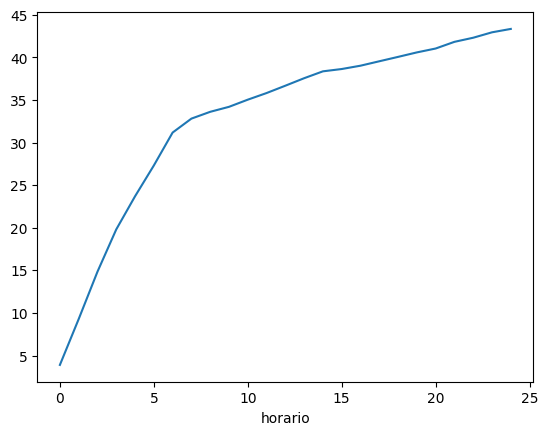

In [5]:
serie_merge[1].plot()

In [6]:
# Selecionando apenas o cabeçalho e as colunas de simulação do WRF
wrf = df.drop(axis=1, columns=['chuva', 'data'])

# Agrupando por eventos e horário a chuva média em angra para criar uma série temporal do WRF
serie_wrf = wrf.groupby(['eventos', 'horario']).mean().drop(axis=1, columns=['latitude', 'longitude'])
serie_wrf

1_1_1     1_1_14     1_1_16      1_1_2      1_1_3  \
eventos horario                                                         
1       0        1.716447   8.927368   5.915452   4.193155   3.517884   
        1        3.644007  16.981747  11.228738   8.238046   8.507694   
        2        5.220755  25.503298  15.605474  12.583043  10.892806   
        3        6.560259  35.734980  18.420334  18.368730  11.983618   
        4        8.768910  46.922165  20.659460  25.555520  12.758395   
...                   ...        ...        ...        ...        ...   
3       20       1.048389   2.906633   1.477857   1.630677   1.015575   
        21       1.103965   2.969978   1.613440   1.645123   1.047149   
        22       1.138016   2.992518   1.694360   1.667299   1.080751   
        23       1.176189   3.029987   1.784008   1.697257   1.122786   
        24       1.195318   3.077844   1.871655   1.718304   1.167055   

                     1_1_4      1_1_5      1_1_6     1_2_1     1_2_14  ...  \
eventos horario                                                        ...   
1       0         7.680114   2.949826   6.155304  3.383330   3.961897  ...   
        1        13.898028   7.022916  10.545285  4.777336   8.028323  ...   
        2        19.442186  10.735194  14.358669  5.556247  12.037756  ...   
        3        22.992395  13.981403  19.390361  6.052737  13.961167  ...   
        4        25.157795  17.052995  25.762252  6.664133  15.957177  ...   
...                    ...        ...        ...       ...        ...  ...   
3       20        0.394952   3.782245   4.218823  8.633893   3.194381  ...   
        21        0.407546   3.790788   4.301343  8.799671   3.454627  ...   
        22        0.419248   3.836630   4.411683  9.001636   3.732200  ...   
        23        0.419917   3.974227   4.505202  9.219353   3.937514  ...   
        24        0.428721   4.134581   4.599629  9.443990   4.157403  ...   

                    3_7_5     3_7_6      3_8_1     3_8_14     3_8_16  \
eventos horario                                                        
1       0        3.472911  2.218419   7.335573  10.711180   3.444395   
        1        6.143032  4.202221  12.785266  18.478640   8.175265   
        2        7.916786  6.569086  17.185859  22.896631  13.614895   
        3        8.879313  7.757543  19.104393  24.441455  18.635994   
        4        9.434029  9.790525  19.861170  26.124787  24.524323   
...                   ...       ...        ...        ...        ...   
3       20       6.540640  8.364651  11.110266  13.816264  12.449312   
        21       7.135486  9.053327  11.148287  14.270393  13.080112   
        22       7.474835  9.423044  11.165588  14.753505  13.565209   
        23       7.998236  9.599289  11.169704  15.285105  14.205232   
        24       8.865484  9.714536  11.172298  15.521757  15.057356   

                     3_8_2      3_8_3     3_8_4      3_8_5      3_8_6  
eventos horario                                                        
1       0         2.566286  11.305793  3.557596   6.770669   5.167948  
        1         7.191399  21.378885  4.642338   9.450390  10.922970  
        2        10.955861  29.027021  5.388924  11.376127  16.742952  
        3        13.549198  34.365661  6.343920  12.899228  21.554268  
        4        16.880897  39.137043  7.044681  15.803372  23.784695  
...                    ...        ...       ...        ...        ...  
3       20        8.775285   6.513754  4.672119   6.879874  12.356592  
        21        8.905806   7.010452  4.917769   6.973206  12.504395  
        22        9.097636   7.401952  5.105904   7.135184  12.770616  
        23        9.269047   7.544601  5.294121   7.387374  12.949263  
        24        9.474641   7.592997  5.441368   7.783521  13.321377  

[75 rows x 192 columns]

# Na variável Serie_wrf '.loc' está selecionando o evento e '.iloc' seleciona os horarios e a simulação, respectivamente

<Axes: xlabel='horario'>

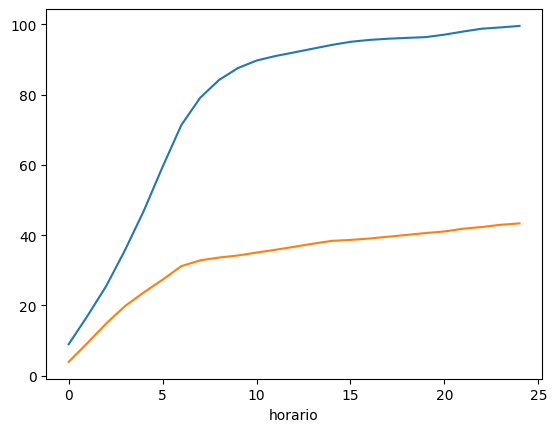

In [7]:
# Plotando a série temporal do WRF para o evento 1 
serie_wrf.loc[1].iloc[:,1].plot()

serie_merge[1].plot()

<Axes: xlabel='horario'>

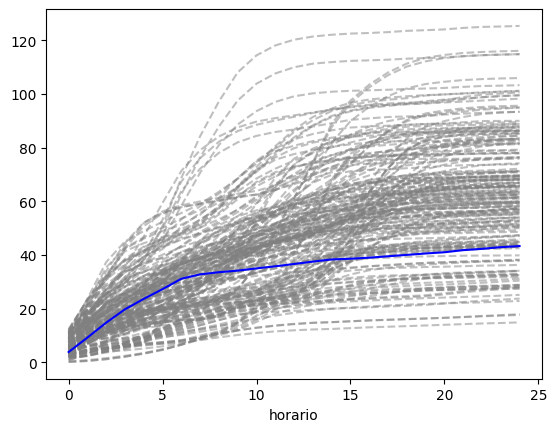

In [8]:
# Plotando a série temporal do WRF para o evento 1 
serie_wrf.loc[1].iloc[:,].plot(linestyle='--', alpha=0.5, color = 'gray', legend = False)

serie_merge[1].plot(color = 'blue')

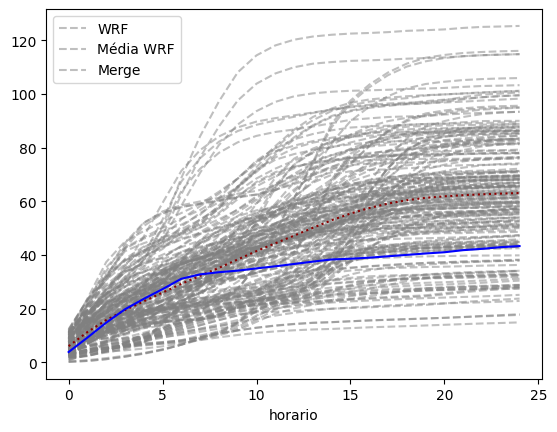

In [9]:
# Plotando a série temporal do WRF para o evento 1 
serie_media_wrf = serie_wrf.mean(axis=1)
serie_wrf.loc[1].iloc[:,].plot(linestyle='--', alpha=0.5, color = 'gray', legend = False, ax = plt.gca(), label = 'WRF')
serie_media_wrf.loc[1].plot(linestyle=':', color = 'darkred', legend = False, label = 'Média WRF')

serie_merge[1].plot(color = 'blue', label = 'Merge')

# Adicionando Legenda no gráfico
plt.legend(['WRF', 'Média WRF', 'Merge'])

In [10]:
# Calculando chuva a média em angra, pelos 28 pontos, na hora 1 do evento 1 do MERGE
merge.loc[(merge['eventos'] == 1) & (merge['horario'] == 1), 'chuva' ].mean()

9.283482142857142

In [11]:
# Calculando chuva a média em angra, pelos 28 pontos, na hora 1 do evento 1 dp  WRF
wrf.loc[(wrf['eventos'] == 1) & (wrf['horario'] == 1)].iloc[:,4:].mean()

1_1_1      3.644007
1_1_14    16.981747
1_1_16    11.228738
1_1_2      8.238046
1_1_3      8.507694
            ...    
3_8_2      7.191399
3_8_3     21.378885
3_8_4      4.642338
3_8_5      9.450390
3_8_6     10.922970
Length: 192, dtype: float64

In [12]:
colunas_wrf = serie_wrf.columns.tolist()

for grade in range(1, 4):
    colunas_grades = [simulacao for simulacao in colunas_wrf if simulacao.startswith(str(grade))]
    print(colunas_grades)


['1_1_1', '1_1_14', '1_1_16', '1_1_2', '1_1_3', '1_1_4', '1_1_5', '1_1_6', '1_2_1', '1_2_14', '1_2_16', '1_2_2', '1_2_3', '1_2_4', '1_2_5', '1_2_6', '1_3_1', '1_3_14', '1_3_16', '1_3_2', '1_3_3', '1_3_4', '1_3_5', '1_3_6', '1_4_1', '1_4_14', '1_4_16', '1_4_2', '1_4_3', '1_4_4', '1_4_5', '1_4_6', '1_5_1', '1_5_14', '1_5_16', '1_5_2', '1_5_3', '1_5_4', '1_5_5', '1_5_6', '1_6_1', '1_6_14', '1_6_16', '1_6_2', '1_6_3', '1_6_4', '1_6_5', '1_6_6', '1_7_1', '1_7_14', '1_7_16', '1_7_2', '1_7_3', '1_7_4', '1_7_5', '1_7_6', '1_8_1', '1_8_14', '1_8_16', '1_8_2', '1_8_3', '1_8_4', '1_8_5', '1_8_6']
['2_1_1', '2_1_14', '2_1_16', '2_1_2', '2_1_3', '2_1_4', '2_1_5', '2_1_6', '2_2_1', '2_2_14', '2_2_16', '2_2_2', '2_2_3', '2_2_4', '2_2_5', '2_2_6', '2_3_1', '2_3_14', '2_3_16', '2_3_2', '2_3_3', '2_3_4', '2_3_5', '2_3_6', '2_4_1', '2_4_14', '2_4_16', '2_4_2', '2_4_3', '2_4_4', '2_4_5', '2_4_6', '2_5_1', '2_5_14', '2_5_16', '2_5_2', '2_5_3', '2_5_4', '2_5_5', '2_5_6', '2_6_1', '2_6_14', '2_6_16', '2_6_2'

In [13]:
serie_merge.index.levels[0]

Index([1, 2, 3], dtype='int64', name='eventos')

In [14]:
serie_wrf[colunas_grades].loc[1]

,3_1_1,3_1_14,3_1_16,3_1_2,3_1_3,3_1_4,3_1_5,3_1_6,3_2_1,3_2_14,...,3_7_5,3_7_6,3_8_1,3_8_14,3_8_16,3_8_2,3_8_3,3_8_4,3_8_5,3_8_6
horario,,,,,,,,,,,,,,,,,,,,,
0,1.703479,10.996990,6.474180,4.577177,4.041341,8.646873,2.610957,5.812464,3.131095,3.262820,...,3.472911,2.218419,7.335573,10.711180,3.444395,2.566286,11.305793,3.557596,6.770669,5.167948
1,3.114836,18.762782,11.616377,9.296778,10.042018,15.843379,7.004567,10.110609,4.338883,8.252546,...,6.143032,4.202221,12.785266,18.478640,8.175265,7.191399,21.378885,4.642338,9.450390,10.922970
2,4.213317,22.540483,16.572808,13.912472,12.569783,21.877670,10.922133,12.220297,5.220872,11.525422,...,7.916786,6.569086,17.185859,22.896631,13.614895,10.955861,29.027021,5.388924,11.376127,16.742952
3,5.343188,29.226562,20.540887,20.543363,13.750506,25.698266,14.422538,16.354342,5.716811,13.177026,...,8.879313,7.757543,19.104393,24.441455,18.635994,13.549198,34.365661,6.343920,12.899228,21.554268
4,7.616423,38.360465,23.127597,29.321441,14.672873,28.311546,17.499856,22.984016,6.243698,15.156458,...,9.434029,9.790525,19.861170,26.124787,24.524323,16.880897,39.137043,7.044681,15.803372,23.784695
5,15.039170,50.057040,25.684265,36.829491,16.037603,29.480707,20.730941,29.956388,7.050521,19.241965,...,9.952975,12.000922,20.686708,28.720838,30.239297,21.915983,43.488643,7.466388,19.727194,26.758727
6,23.861013,63.873604,28.535110,41.210513,17.301571,29.864769,24.804122,37.473166,7.838808,21.572556,...,11.266681,13.990276,21.818085,30.964007,36.207982,26.491653,46.742653,8.071124,22.967955,28.996198
7,31.431255,72.164692,31.907442,43.176664,18.574985,30.094256,28.998207,44.434500,9.444514,22.601835,...,12.640575,15.909452,23.498716,32.789729,40.620306,30.268921,50.268734,9.267673,25.792237,30.864796
8,37.210089,78.102676,33.995568,44.774675,19.877006,30.602539,32.177745,49.099736,11.172194,23.188235,...,14.157003,17.519196,25.514797,36.151029,43.778294,34.234492,55.126966,10.817182,29.739059,32.415083


1 1
1 2
1 3
2 1
2 2
2 3
3 1
3 2
3 3


Text(0.5, 0.98, 'Comparação entre a precipitação acumulada do MERGE e WRF')

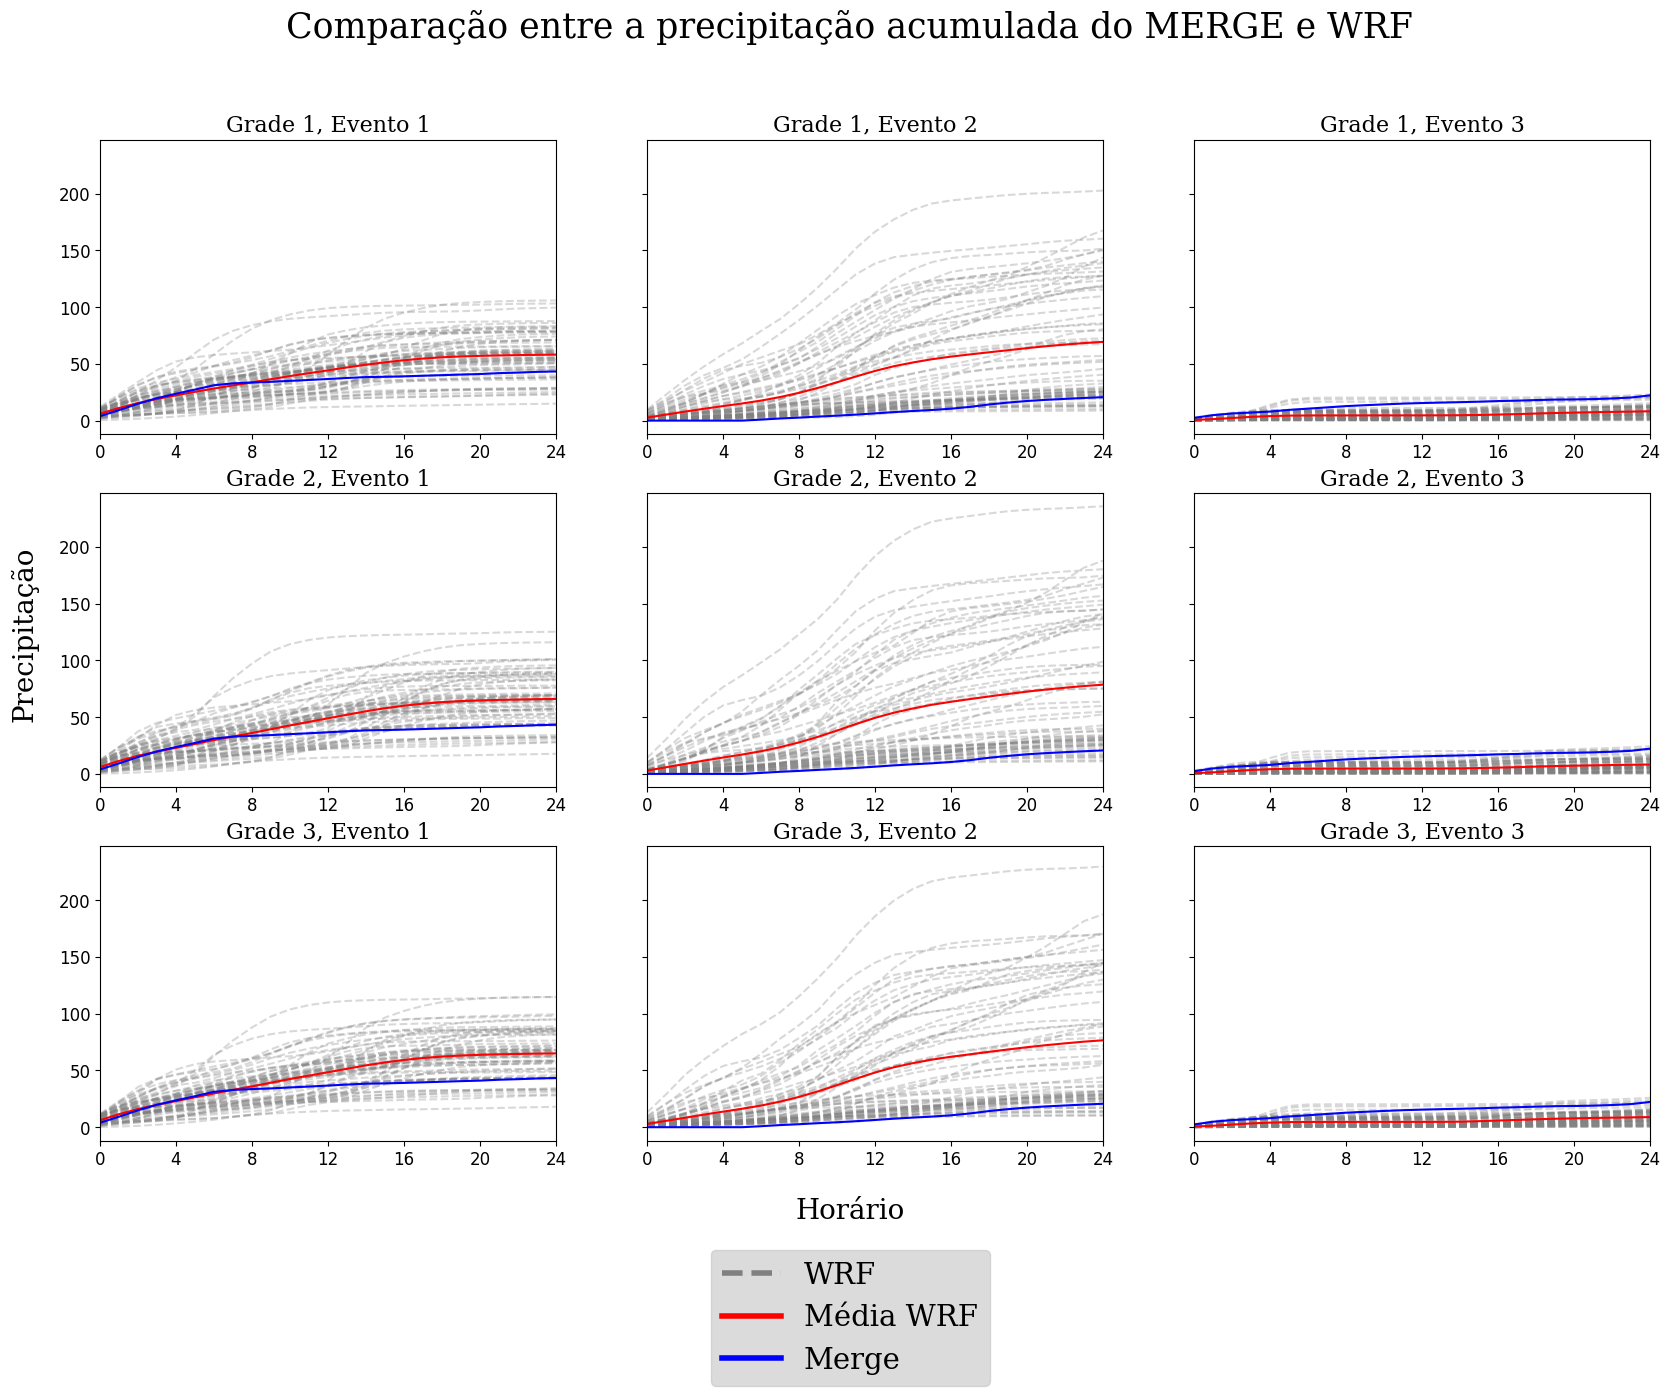

In [ ]:
fig, axes = plt.subplots(3, 3, figsize=(20, 13), sharey=True) 
for grade in range(1, 4):
    # Criando grades de simulações 
    colunas_grades = [simulacao for simulacao in colunas_wrf if simulacao.startswith(str(grade))]
    
    # Selecionando os indices de todos os eventos
    for evento in serie_merge.index.levels[0]:
        print(grade, evento)
        serie_media_wrf = serie_wrf[colunas_grades].mean(axis=1)

        axes[grade-1, evento-1].plot(serie_wrf[colunas_grades].loc[evento], color = 'gray', linestyle='--', alpha=0.3, label = 'WRF')
        axes[grade-1,evento-1].plot(serie_media_wrf.loc[evento], color = 'red', label = 'Média WRF')
        axes[grade-1, evento-1].plot(serie_merge[evento], color = 'blue', label = 'Merge')
        
        # Adicionando o título para cada grade
        axes[grade-1, evento-1].set_title(f"Grade {grade}, Evento {evento}", fontsize=16, fontfamily = 'serif')

        # Ajustando os rótulos dos eixos
        axes[grade-1, evento-1].tick_params(axis = 'x', labelsize=12)
        axes[grade-1, evento-1].tick_params(axis = 'y', labelsize=12)

        # Adicionando limites para os eixos
        axes[grade-1, evento-1].set_xticks(range(0, 25, 4))
        axes[grade-1, evento-1].set_xlim(0, 24)

# Definindo os nomes dos eixos compartilhados
fig.text(0.5, 0.05, 'Horário', ha='center', fontsize=20, fontfamily = 'serif')
fig.text(0.08, 0.5, 'Precipitação', va='center', rotation='vertical', fontsize=20, fontfamily = 'serif')

# Adicionando legenda
custom_lines = [Line2D([0], [0], color= 'gray', lw=4, linestyle = '--'),
                Line2D([0], [0], color= 'red', lw=4),
                Line2D([0], [0], color= 'blue', lw=4)]
fig.legend(custom_lines, ['WRF', 'Média WRF', 'Merge'], loc = 'lower center', fontsize = 25, bbox_to_anchor=(0.5, -0.09), facecolor = 'lightgray', prop = {'family': 'serif', 'size': 21})

# fig.get_frame().set_facecolor('lightgray')

# adicionando titulo
fig.suptitle('Comparação entre a precipitação acumulada do MERGE e WRF', fontsize=25, fontfamily = 'serif')